# Stock Prediction Model

*This project refereed to: Analytic Vidhay and Aspress*
*https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/*

*https://learning.oreilly.com/videos/data-analytics-of/9781484256473/9781484256473-Macarty_Segment1*


## Use Investpy and Linear Regression, KNN, Auto-Arisma, Prophet, LSTM

In [25]:
! pip3 install investpy
import investpy
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline



In [26]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

import pandas as pd

##### Date

##### Note: the default time format of InvestPy is "%d/%m/%y"

In [27]:
import datetime
from datetime import date

today = datetime.datetime.now().strftime('%d/%m/%Y')
one_year_before = (datetime.datetime.now() - datetime.timedelta(days=365)).strftime('%d/%m/%Y')
one_month_before = (datetime.datetime.now() - datetime.timedelta(days=30)).strftime('%d/%m/%Y')

print("Today is: "+ today)
print("\nOne year before is: "+ one_year_before)
print("\nOne month before is: "+ one_month_before)

Today is: 12/01/2021

One year before is: 13/01/2020

One month before is: 13/12/2020


In [32]:
import investpy

df_year = investpy.get_stock_historical_data(stock='AAPL',
                                        country='United States',
                                        from_date= one_year_before,
                                        to_date= one_month_before)
print("Train data: \n")
print(df_year.head())

df_month = investpy.get_stock_historical_data(stock='AAPL',
                                        country='United States',
                                        from_date= one_month_before,
                                        to_date= today)
print("\nTest data: \n")
print(df_month.head())


Train data: 

             Open   High    Low  Close     Volume Currency
Date                                                      
2020-01-13  77.91  79.27  77.79  79.24  122086888      USD
2020-01-14  79.17  79.39  78.04  78.17  162613824      USD
2020-01-15  77.96  78.88  77.39  77.83  121923528      USD
2020-01-16  78.40  78.92  78.02  78.81  108829016      USD
2020-01-17  79.07  79.69  78.75  79.68  137816464      USD

Test data: 

              Open    High     Low   Close     Volume Currency
Date                                                          
2020-12-14  122.54  123.32  121.72  121.78   79075984      USD
2020-12-15  124.26  127.89  124.15  127.88  157572256      USD
2020-12-16  127.41  128.37  126.56  127.81   96927000      USD
2020-12-17  129.00  129.52  128.05  128.70   94359808      USD
2020-12-18  128.96  129.10  126.12  126.65  192540992      USD


### Linear Regression


In [33]:
#split into train and validation
train = df_year
test = df_month

x_train = train.drop(['Close', 'Currency'], axis=1)
y_train = train['Close']
x_test = test.drop(['Close','Currency'], axis=1)
y_test = test['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#make predictions and find the rmse
preds = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

0.97431999462388

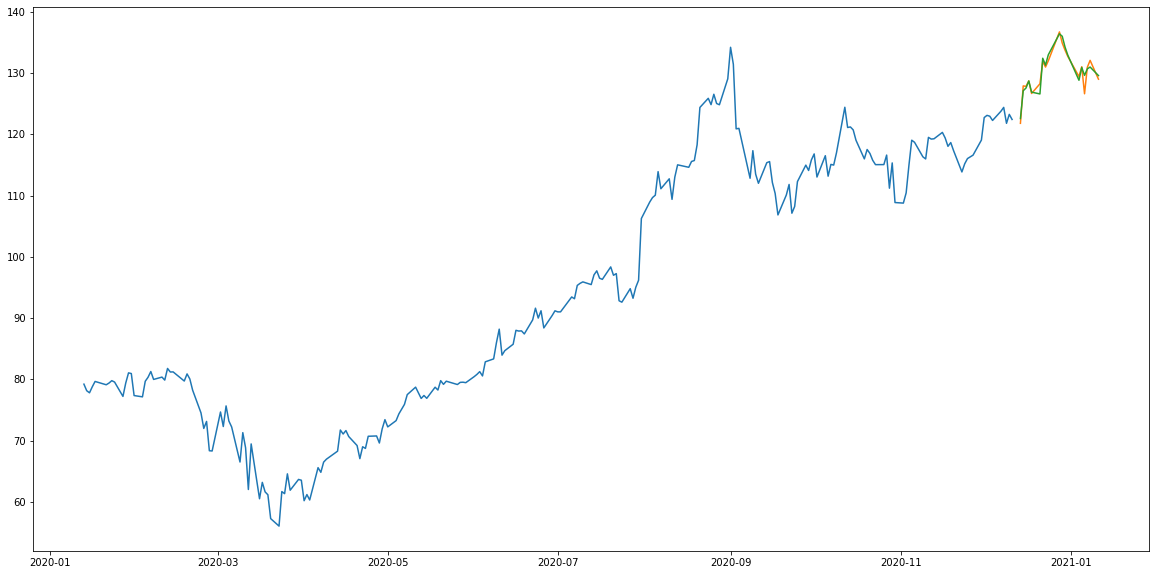

In [35]:
test['Predictions'] = 0
test['Predictions'] = preds

plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])

#### After evaluation, KNN is not ideal for this question, so the operaor moved to Auto-ARIMA

### Auto-ARIMA (Auto Refressive Integrated Moving Average)


In [40]:
!pip3 install pmdarima
#!pip3 install pmdarima.arima

In [47]:
from pmdarima import auto_arima

train = df_year
test = df_month

training = train['Close']
testing = test['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods= len(df_month['Close']))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1211.142, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1168.970, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1207.814, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1119.958, Time=0.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.27 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1122.985, Time=0.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1121.666, Time=0.55 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1121.642, Time=0.66 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1120.337, Time=0.41 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=1118.380, Time=3.05 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=inf, Time=2.72 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=1

In [48]:
forecast = pd.DataFrame(forecast,index = testing.index,columns=['Prediction'])

In [49]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

6.068878164079672

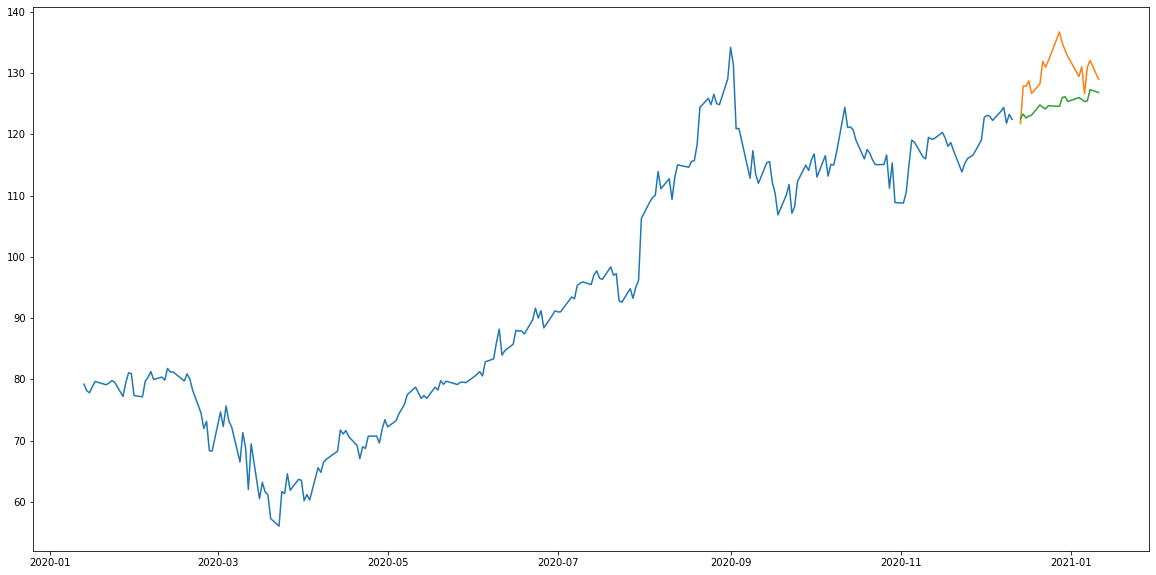

In [51]:
#plot
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(forecast['Prediction'])